# Procesos Estocásticos: Trabajo Práctico N° 2

In [1]:
import math
import numpy as np
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt

## Ejercicio 1: Estimado insesgado y sesgado de la autocorrelación


In [2]:
# Genera N realizaciones de ruido blanco gaussiano
N = 10000
ruido_blanco = np.random.normal(0, 1, N)

Text(0, 0.5, '$\\hat{R}_{Y}(k)$')

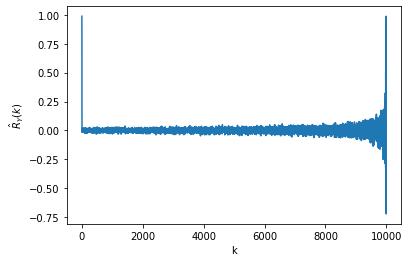

In [3]:
#Estimador insesgado
R_insesgado = [0]*N
for k in range(N):
    for n in range(k+1,N):
        R_insesgado[k] += ruido_blanco[n]*ruido_blanco[n-k]
    R_insesgado[k] /= N-k

plt.figure()
plt.plot(R_insesgado)
plt.xlabel('k')
plt.ylabel('$\hat{R}_{Y}(k)$')

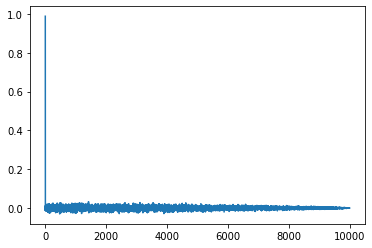

In [4]:
#Estimador sesgado
R_sesgado = np.ndarray(N)
for k in range(N):
    for n in range(k+1,N):
        R_sesgado[k] += ruido_blanco[n]*ruido_blanco[n-k]
    R_sesgado[k] /= N

plt.plot(R_sesgado)


## Ejercicio 2: (In)consistencia del periodograma

### 1. Verdadera densidad espectral de potencia de $Y$

$Y(n) = (h * X)(n) \to S_{y}(\omega) = |H(\omega)|^{2} S_{X}(\omega)$

Como $X$ es ruido blanco $S_{X}(\omega) = 1 \quad \forall \omega$

Entonces $S_{y}(\omega) = |H(\omega)|^{2}$

Text(0, 0.5, 'Potencia')

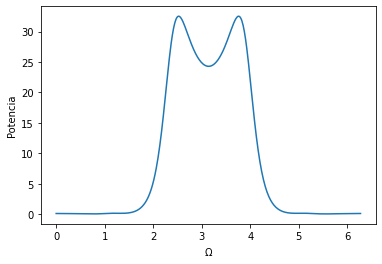

In [5]:
H_num = np.array([1, -1.3817, 1.5632, -0.8843, 0.4096])
H_den = np.array([1, 0.3544, 0.3508, 0.1736, 0.2401])

wy, Hy = signal.freqz(H_num, H_den, whole=True)
Sy = np.power(np.abs(Hy), 2)

plt.figure()
plt.plot(wy, Sy)
plt.xlabel('$\Omega$')
plt.ylabel('Potencia')

### 2. Periodigrama promedio

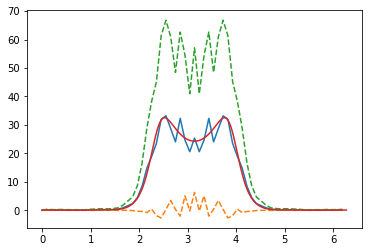

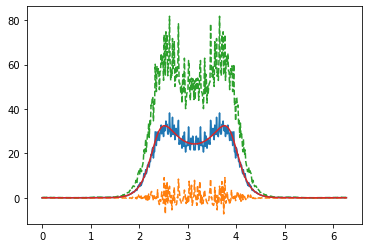

In [6]:
def correlograma_promedio(H_num, H_den, X):
    J = X.shape[0]
    N = X.shape[1]

    Sp = np.zeros(N)
    Sp_i = np.zeros((J, N))

    for i in range(J):
        Y = signal.lfilter(H_num, H_den, X[i])
        _, Sp_i[i] = signal.periodogram(Y, return_onesided=False)
        Sp += Sp_i[i]
    
    Sp /= J

    var = np.zeros(N)

    for i in range(J):
        var += np.power((Sp_i[i] - Sp), 2)
    
    var /= (J-1)

    return Sp, var

J = 100

N = 64
X = np.random.normal(0, 1, (J, N))
Sp, var = correlograma_promedio(H_num, H_den, X)

plt.figure()
n = np.linspace(0, 2*np.pi, num=Sp.shape[0], endpoint=False)
plt.plot(n, Sp)
plt.plot(n, np.sqrt(var)-Sp, '--')
plt.plot(n, np.sqrt(var)+Sp, '--')
plt.plot(wy, Sy)

N = 512
X = np.random.normal(0, 1, (J, N))
Sp, var = correlograma_promedio(H_num, H_den, X)

plt.figure()
n = np.linspace(0, 2*np.pi, num=Sp.shape[0], endpoint=False)
plt.plot(n, Sp)
plt.plot(n, np.sqrt(var)-Sp, '--')
plt.plot(n, np.sqrt(var)+Sp, '--')
plt.plot(wy, Sy)

### 3. Bartlet

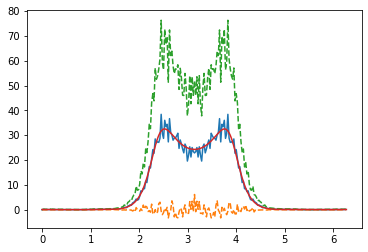

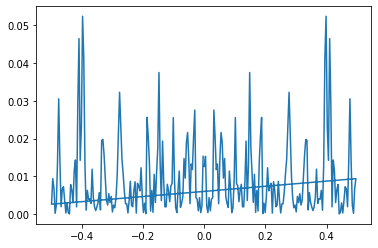

In [7]:
J = 100
N = 256
X = np.random.normal(0, 1, (J, N))
Sp, var = correlograma_promedio(H_num, H_den, X)

plt.figure()
n = np.linspace(0, 2*np.pi, num=Sp.shape[0], endpoint=False)
plt.plot(n, Sp)
plt.plot(n, np.sqrt(var)-Sp, '--')
plt.plot(n, np.sqrt(var)+Sp, '--')
plt.plot(wy, Sy)

bartlett = np.zeros(N)
window = signal.get_window('bartlett', round(N/2)+2)
for i in range(J):
    # Falta filtrar la señal
    f, Pxx = signal.periodogram(X[i], window='bartlett', return_onesided=False)
    bartlett += Pxx

Pxx /= J
plt.figure()
plt.plot(f, Pxx)

In [8]:
N = 32
M = round(N/2)
print(M)

signal.get_window('bartlett', round(N/2)+2)
signal.get_window('bartlett', round(N/2)+2, fftbins=False)

16


array([0.        , 0.11764706, 0.23529412, 0.35294118, 0.47058824,
       0.58823529, 0.70588235, 0.82352941, 0.94117647, 0.94117647,
       0.82352941, 0.70588235, 0.58823529, 0.47058824, 0.35294118,
       0.23529412, 0.11764706, 0.        ])

In [9]:
x = np.random.normal(0,1, (3,3))
print(x)

[[ 1.39776154  0.76858656  0.83822143]
 [ 0.80126175 -0.15806889 -1.8201555 ]
 [-0.01575497 -1.53847586 -1.16148486]]


### Akaike

## Comparación entre el periodograma puro y el estimador de Welch

Text(0, 0.5, 'Potencia (dB)')

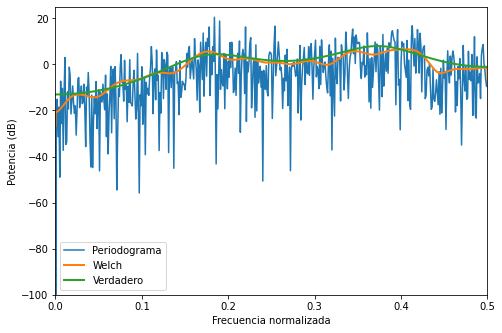

In [10]:
N = 1000 #Cantidad de muestras
W = np.random.normal(0, 1, N) #Ruido blanco
H_den = np.array([1, 0.3544, 0.3508, 0.1736, 0.2401]) #Filtro
Y = signal.lfilter([1], H_den, W)
#Periodograma
fp, Syp = signal.periodogram(Y)
Syp /= 2
#Estimador de Welch
fw, Syw = signal.welch( Y, nperseg=50, noverlap=25, nfft=5000)
Syw /= 2
#PSD Verdadera
fy, Hy = signal.freqz([1], H_den, fs=1)
Sy = np.power(np.abs(Hy), 2)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(fp, 20*np.log10(Syp))
ax.plot(fw, 20*np.log10(Syw), linewidth=2)
ax.plot(fy, 20*np.log10(Sy), linewidth=2)
ax.set(xlim=(0, 0.5), ylim=(-100, 25))
ax.legend(labels=('Periodograma', 'Welch', 'Verdadero'))
ax.set_xlabel('Frecuencia normalizada')
ax.set_ylabel('Potencia (dB)')

Text(0, 0.5, 'Potencia (dB)')

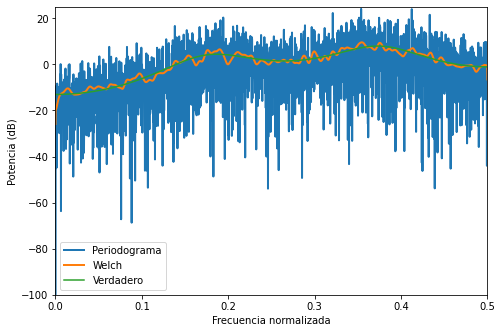

In [11]:
N = 5000 #Cantidad de muestras
W = np.random.normal(0, 1, N) #Ruido blanco
H_den = np.array([1, 0.3544, 0.3508, 0.1736, 0.2401]) #Filtro
Y = signal.lfilter([1], H_den, W)

#Periodograma
fp, Syp = signal.periodogram(Y)
Syp /= 2
#Estimador de Welch
fw, Syw = signal.welch( Y, nperseg=250, noverlap=125, nfft=5000)
Syw /= 2
#PSD Verdadera
fy, Hy = signal.freqz([1], H_den, fs=1)
Sy = np.power(np.abs(Hy), 2)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(fp, 20*np.log10(Syp), linewidth=2)
ax.plot(fw, 20*np.log10(Syw), linewidth=2)
ax.plot(fy, 20*np.log10(Sy))
ax.set(xlim=(0, 0.5), ylim=(-100, 25))
ax.legend(labels=('Periodograma', 'Welch', 'Verdadero'))
ax.set_xlabel('Frecuencia normalizada')
ax.set_ylabel('Potencia (dB)')

## Comparación entre el estimador MV y el estimador de Welch

Coeficientes verdaderos:
 [0.3544 0.3508 0.1736 0.2401]
Est. m = 4:
 [0.299831 0.339701 0.200538 0.265195]
Varianza:  1.0361858542282725
AIC:  5756.847180260678

Akaike:
 [0.299831 0.339701 0.200538 0.265195]
Varianza:  1.0361858542282725
AIC:  5756.847180260678
Delta:
 [302.300225 178.134333 142.648461   0.         3.996521   6.263294
   4.33579    3.563208   7.370493  10.292491]


Text(0, 0.5, 'Potencia (dB)')

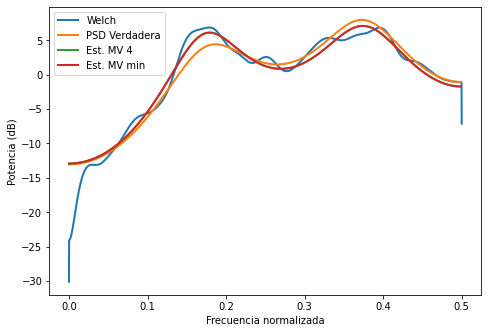

In [12]:
N = 1000 #Cantidad de muestras
W = np.random.normal(0, 1, N) #Ruido blanco
H_den = np.array([1, 0.3544, 0.3508, 0.1736, 0.2401]) #Filtro
Y = signal.lfilter(np.array([1]), H_den, W)

#-------------------------------------------------------------------------------
#Estimación del modelo de orden m.
def estimador_MV(Y, m):
    N = Y.shape[0]
    a = np.arange(N-m-1, -1, -1, dtype=int)
    b = np.arange(N-m-1, N-1, dtype=int)
    pos_mat = sp.linalg.toeplitz(a,b)[::-1]
    Y_mat = Y[pos_mat]
    pos_vec = np.arange(m, N)
    y_vec = Y[pos_vec]
    a_est, _, _, _ = np.linalg.lstsq(Y_mat, y_vec, rcond=None)
    var = np.sum(np.power(y_vec - (Y_mat@a_est), 2))/(N-m)
    AIC = 2*(m+1)+2*N*(1+np.log(2*np.pi*var))

    return -a_est[::-1], var, AIC
#-------------------------------------------------------------------------------

#-------------------------------------------------------------------------------
#Métrica de Akaike para determinar el orden del modelo.
m = 10
np.set_printoptions(precision=6)
print('Coeficientes verdaderos:\n', H_den[1:H_den.shape[0]])
AIC_min = math.inf

AIC = np.zeros(m, dtype=float)

for i in range(1, m+1):
    a_est_i, var_i, AIC_i = estimador_MV(Y,i)
    AIC[i-1] = AIC_i

    if i == 4:
        a_est_4, var_4, AIC_4 = a_est_i, var_i, AIC_i
        print('Est. m = 4:\n', a_est_i)
        print('Varianza: ', var_i)
        print('AIC: ', AIC_i)
    
    if AIC_i < AIC_min:
        a_est_min, var_min, AIC_min = a_est_i, var_i, AIC_i

print('\nAkaike:\n', a_est_min)
print('Varianza: ', var_min)
print('AIC: ', AIC_min)

#-------------------------------------------------------------------------------
#Soporte empírico.
print('Delta:\n', AIC-AIC_min)

#-------------------------------------------------------------------------------
#Gráficos comparativos
#Estimador de Welch
fw, Syw = signal.welch( Y, nperseg=50, noverlap=25, nfft=5000)
Syw /= 2
#PSD Verdadera
fy, Hy = signal.freqz([1], H_den, fs=1)
Sy = np.power(np.abs(Hy), 2)
#Estimación de orden 4
fy4, Hy4 = signal.freqz([1], np.concatenate(([1], a_est_4)), fs=1)
Sy4 = np.power(np.abs(Hy4), 2)
#Estimación de métrica mínima
fymin, Hymin = signal.freqz([1], np.concatenate(([1], a_est_min)), fs=1)
Symin = np.power(np.abs(Hymin), 2)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(fw, 20*np.log10(Syw), linewidth=2)
ax.plot(fy, 20*np.log10(Sy), linewidth=2)
ax.plot(fy4, 20*np.log10(Sy4), linewidth=2)
ax.plot(fymin, 20*np.log10(Symin), linewidth=2)
ax.legend(labels=('Welch', 'PSD Verdadera', 'Est. MV 4', 'Est. MV min'))
ax.set_xlabel('Frecuencia normalizada')
ax.set_ylabel('Potencia (dB)')

Text(0, 0.5, 'Cantidad')

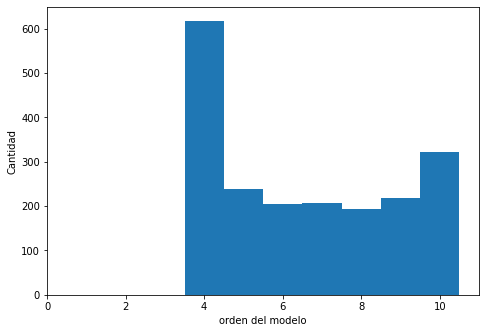

In [13]:
#-------------------------------------------------------------------------------
#Histograma.

N = 1000 #Cantidad de muestras
m = 10
H_den = np.array([1, 0.3544, 0.3508, 0.1736, 0.2401])

J = 2000
hist = np.zeros(J)
for i in range(J):
    W = np.random.normal(0, 1, N)
    Y = signal.lfilter(np.array([1]), H_den, W)

    AIC = np.inf
    model = 0
    for k in range(1, m+1):
        _, _, AIC_k = estimador_MV(Y,k)
        if AIC_k < AIC:
            AIC = AIC_k
            model = k

    hist[i] = model

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bins = np.linspace(0.5, m+0.5, num=m+1, endpoint=True)
ax.hist(hist, bins=bins)
ax.set_xlabel('orden del modelo')
ax.set_ylabel('Cantidad')

### Aplicacion a un proceso con modelo desconocido

5000


Text(0, 0.5, 'Potencia (dB)')

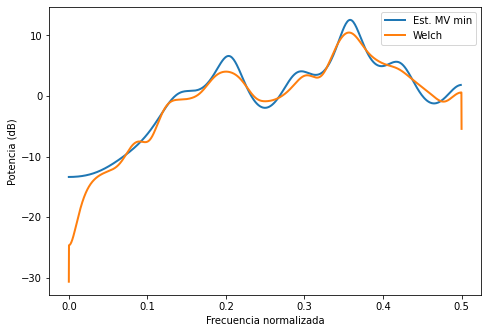

In [16]:
#Ejecutar celda offline.

data = np.loadtxt('Ej4.csv', dtype='float')
m = 20

print()

model = 0
AIC_min = np.inf
for i in range(1, m+1):
    a_est_i, var_i, AIC_i = estimador_MV(Y,i)
    
    if AIC_i < AIC_min:
        a_est_min, var_min, AIC_min = a_est_i, var_i, AIC_i
        model = i
        
#Estimación de métrica mínima
fymin, Hymin = signal.freqz([1], np.concatenate(([1], a_est_min)), fs=1)
Symin = np.power(np.abs(Hymin), 2)
#Estimador de Welch
fw, Syw = signal.welch( Y, nperseg=50, noverlap=25, nfft=5000)
Syw /= 2

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(fymin, 20*np.log10(Symin), linewidth=2)
ax.plot(fw, 20*np.log10(Syw), linewidth=2)
ax.legend(labels=('Est. MV min', 'Welch'))
ax.set_xlabel('Frecuencia normalizada')
ax.set_ylabel('Potencia (dB)')